# Use Bio-NER and Bio-ER model to construct knowledge graph

### Steps 

### 1, Reading a PDF document with OCR
### 2, Text preprocessing
### 3, Biomedical concept recognition and linking
### 4, Relation extraction

=====================================================================================================================

### 1, Try OCR (optical character recognition) PDF reader

In [1]:
import requests
import pdf2image
import pytesseract

### 2, Use txt

In [2]:
### as PDF reader not working, try txt first 

# ====== input txt ===== 
with open('Raw_Corpus.txt', 'r', encoding = 'utf-8') as f: 
    articles = f.read()

# tokenize txt to sentences    
import nltk

sentences = nltk.tokenize.sent_tokenize(articles)

# modifiy the newline char
import re 

list1 = []
for sent in sentences:
    sent = str(sent)
    sent2 = sent.replace('\n', ' ')
    list1.append(sent2)

# print and check
print()
print(list1[0:5])

# re-assign name
sentences = list1
article_text = articles


['Literature linking the effects of prepartum nutrition and subsequent fertility is scarce.', 'Most of what is suggested to optimize future fertility is related to relationships between metabolic disorders and risk for delayed conception.', 'Common metabolic problems that affect early postpartum cows such as retained fetal membranes, milk fever, ketosis, and displaced abomasum are know to extend the period of negative energy balance and delay resumption of ovarian cycles.', 'Manipulation of the energy content of the diet prepartum has been shown to affect dry matter intake (Hayirli et al., 2002) and postpartum lactational performance.', 'Cows fed high fermentable energy diets prepartum have improved energy balance, reduced concentrations of plasma nonesterified fatty acids and ß-hydroxybutyrate, and reduced triacylglycerol infiltration in the hepatic tissue.']


# 3, Biomedical NER (BERN)

#### neural biomedical entity recognition and multi-type normalization tool (BERN) that uses neural network based NER models (BioBERT (Lee et al., 2019)) to recognize known entities and discover new entities for 18.4+ millions of PubMed articles (https://bern.korea.ac.kr/)

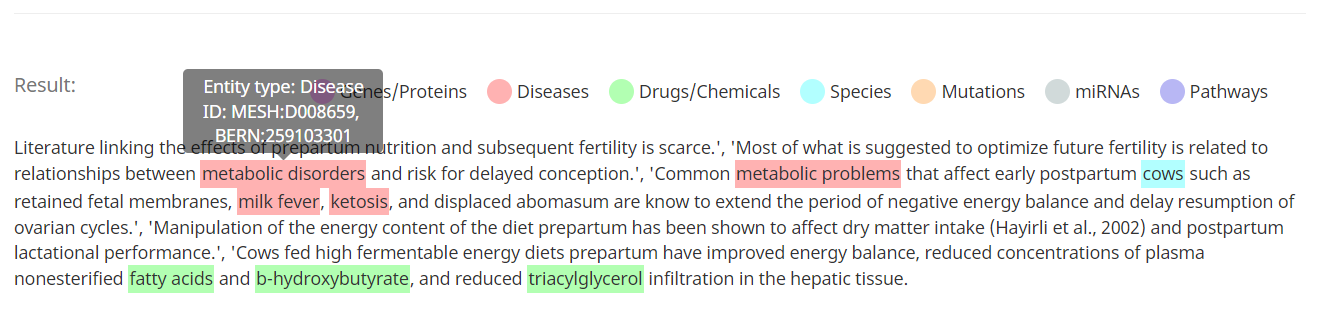

In [3]:
# assign concept name id if entity name is not assign 

import hashlib

from requests.packages import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# ====== BERN API =====
def query_raw(text, url="https://bern.korea.ac.kr/plain"):
    """Biomedical entity linking API"""
    return requests.post(url, verify=False, data={'sample_text': text}).json()

# ===== entity_list =====
entity_list = []

# parsing the text 
# the last sentence is invalid
for s in sentences[:-1]:
    entity_list.append(query_raw(s))

# ===== parsed_entities =====
parsed_entities = []
for entities in entity_list:
    e = []
    
    # if there are not entities in the text
    if not entities.get('denotations'):
        parsed_entities.append({'text':entities['text'], 'text_sha256': hashlib.sha256(entities['text'].encode('utf-8')).hexdigest()})
        continue
    # if it in 
    for entity in entities['denotations']:
        
        # id
        other_ids = [id for id in entity['id'] if not id.startswith("BERN")]
        
        # type
        entity_type = entity['obj']
        
        # name
        entity_name = entities['text'][entity['span']['begin']:entity['span']['end']]
        
        # other id
        try:
            entity_id = [id for id in entity['id'] if id.startswith("BERN")][0]
        except IndexError:
            entity_id = entity_name
        
        e.append({'entity_id': entity_id, 'other_ids': other_ids, 'entity_type': entity_type, 'entity': entity_name})
    parsed_entities.append({'entities':e, 'text':entities['text'], 'text_sha256': hashlib.sha256(entities['text'].encode('utf-8')).hexdigest()})


In [ ]:
# with write and json.dump() 
import json

with open("parsed_entities.json", "w") as file: 
    json.dump(parsed_entities, file)

### ===== Can load in json from here =====

In [21]:
# read and load 
import json

with open("new_json_2021_12_02.json", "r") as read_file:
    data = json.load(read_file)

parsed_entities = data

num = 2

print("An example of a sentence: ")
print()
print("The complete data: ", parsed_entities[num])
print()
print("The entities list in the sentence: ", parsed_entities[num]['entities'])
print()
print("The entity in the sentence: ")
for i in range(len(parsed_entities[num]['entities'])):
    print(parsed_entities[num]['entities'][i]['entity'])
print() 
print("The text: ", parsed_entities[num]['text'] )

An example of a sentence: 

The complete data:  {'entities': [{'entity_id': 'cows', 'other_ids': ['NCBI:txid9913'], 'entity_type': 'species', 'entity': 'cows'}, {'entity_id': 'BERN:259786501', 'other_ids': ['MESH:D010319'], 'entity_type': 'disease', 'entity': 'milk fever'}, {'entity_id': 'BERN:258804201', 'other_ids': ['MESH:D007662'], 'entity_type': 'disease', 'entity': 'ketosis'}, {'entity_id': 'ketosis', 'entity_type': 'disease', 'entity': 'ketosis'}, {'entity_id': 'milk fever', 'entity_type': 'disease', 'entity': 'milk fever'}, {'entity_id': 'displaced abomasum', 'entity_type': 'disease', 'entity': 'displaced abomasum'}, {'entity_id': 'retained fetal membranes', 'entity_type': 'disease', 'entity': 'retained fetal membranes'}, {'entity_id': 'negative energy balance', 'entity_type': 'disease', 'entity': 'negative energy balance'}], 'text': 'Common metabolic problems that affect early postpartum cows such as retained fetal membranes, milk fever, ketosis, and displaced abomasum are kno

In [22]:
num = 2

print("An example of a sentence: ")
print()
print("The complete data: ", parsed_entities[2])
print()
#print("The entities list in the sentence: ", parsed_entities[2]['text'])
print()
print("The entity in the sentence: ")
#for i in range(len(parsed_entities[2]['entities'])):
#    print(parsed_entities[2]['entities'][i]['entity'])

An example of a sentence: 

The complete data:  {'entities': [{'entity_id': 'cows', 'other_ids': ['NCBI:txid9913'], 'entity_type': 'species', 'entity': 'cows'}, {'entity_id': 'BERN:259786501', 'other_ids': ['MESH:D010319'], 'entity_type': 'disease', 'entity': 'milk fever'}, {'entity_id': 'BERN:258804201', 'other_ids': ['MESH:D007662'], 'entity_type': 'disease', 'entity': 'ketosis'}, {'entity_id': 'ketosis', 'entity_type': 'disease', 'entity': 'ketosis'}, {'entity_id': 'milk fever', 'entity_type': 'disease', 'entity': 'milk fever'}, {'entity_id': 'displaced abomasum', 'entity_type': 'disease', 'entity': 'displaced abomasum'}, {'entity_id': 'retained fetal membranes', 'entity_type': 'disease', 'entity': 'retained fetal membranes'}, {'entity_id': 'negative energy balance', 'entity_type': 'disease', 'entity': 'negative energy balance'}], 'text': 'Common metabolic problems that affect early postpartum cows such as retained fetal membranes, milk fever, ketosis, and displaced abomasum are kno

# 4, Connect neo4j sandbox and import the entities

### neo4j connection 

In [23]:
from neo4j import GraphDatabase
import pandas as pd

host = 'bolt://35.171.27.95:7687'
user = 'neo4j'
password = 'halts-officials-date'
driver = GraphDatabase.driver(host,auth=(user, password))

def neo4j_query(query, params=None):
    with driver.session() as session:
        result = session.run(query, params)
        return pd.DataFrame([r.values() for r in result], columns=result.keys())

In [24]:
# author and article 
article_txt = articles


author = article_txt.split("\n")[0]
title = " ".join(article_txt.split("\n")[2:4])

neo4j_query("""
MERGE (a:Author{name:$author})
MERGE (b:Article{title:$title})
MERGE (a)-[:WROTE]->(b)
""", {'title':title, 'author':author})

Empty DataFrame
Columns: []
Index: []

### import sentences and mentioned entities 

In [25]:
# sentences and mentioned entities 

neo4j_query("""
MATCH (a:Article)
UNWIND $data as row
MERGE (s:Sentence{id:row.text_sha256})
SET s.text = row.text
MERGE (a)-[:HAS_SENTENCE]->(s)

WITH s, row.entities as entities
UNWIND entities as entity
MERGE (e:Entity{id:entity.entity_id})
ON CREATE SET e.other_ids = entity.other_ids,
              e.name = entity.entity,
              e.type = entity.entity_type
              
MERGE (s)-[m:MENTIONS]->(e)
ON CREATE SET m.count = 1
ON MATCH SET m.count = m.count + 1
""", {'data': parsed_entities})

Empty DataFrame
Columns: []
Index: []

In [26]:
### KG applications: 

### search entities 

### co-occurence analysis 

### inspect author expertise 


# 5, Relation extraction 

#### fewrel-zero-shot model based on BERT

In [27]:
from transformers import AutoTokenizer
from zero_shot_re import RelTaggerModel, RelationExtractor

# model 
model = RelTaggerModel.from_pretrained("fractalego/fewrel-zero-shot")

# tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

# ===== relations =====
relations = ['associated', 'interacts']

# extractor 
extractor = RelationExtractor(model, tokenizer, relations)

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertModel: ['qa_outputs.weight', 'qa_outputs.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### find sentences where two more entities are mentioned 

### set prediction confidence threshold as 0.85, only accept predictionshigher than the threshold

In [28]:
# find sentences where two more entities are mentioned 

# set prediction threshold as 0.85 

import itertools

# candidate sentence where there is more than a single entity present
# if len(s['entity']) >= 1
candidates = [s for s in parsed_entities if (s.get('entities')) and (len(s['entities']) > 1)]

predicted_rels = []
for c in candidates:
    combinations = itertools.combinations([{'name':x['entity'], 'id':x['entity_id']} for x in c['entities']], 2)
    for combination in list(combinations):
        try:
            
            # use extractor 
            ranked_rels = extractor.rank(text=c['text'].replace(",", " "), 
                                         head=combination[0]['name'], 
                                         tail=combination[1]['name'])
            
            # define threshold for the most probable relation
            if ranked_rels[0][1] > 0.70:
                predicted_rels.append({'head': combination[0]['id'], 
                                       'tail': combination[1]['id'], 
                                       'type':ranked_rels[0][0], 
                                       'source': c['text_sha256']})
        except:
            pass

# Store relations to Neo4j
neo4j_query("""
UNWIND $data as row
MATCH (source:Entity {id: row.head})
MATCH (target:Entity {id: row.tail})
MATCH (text:Sentence {id: row.source})

MERGE (source)-[:REL]->(r:Relation {type: row.type})-[:REL]->(target)
MERGE (text)-[:MENTIONS]->(r)
""", {'data': predicted_rels})

Empty DataFrame
Columns: []
Index: []

In [ ]:
# neo4j sandbox 

# bolt://54.165.118.218:7687

# Username: neo4j

# Password: inventory-discount-comma


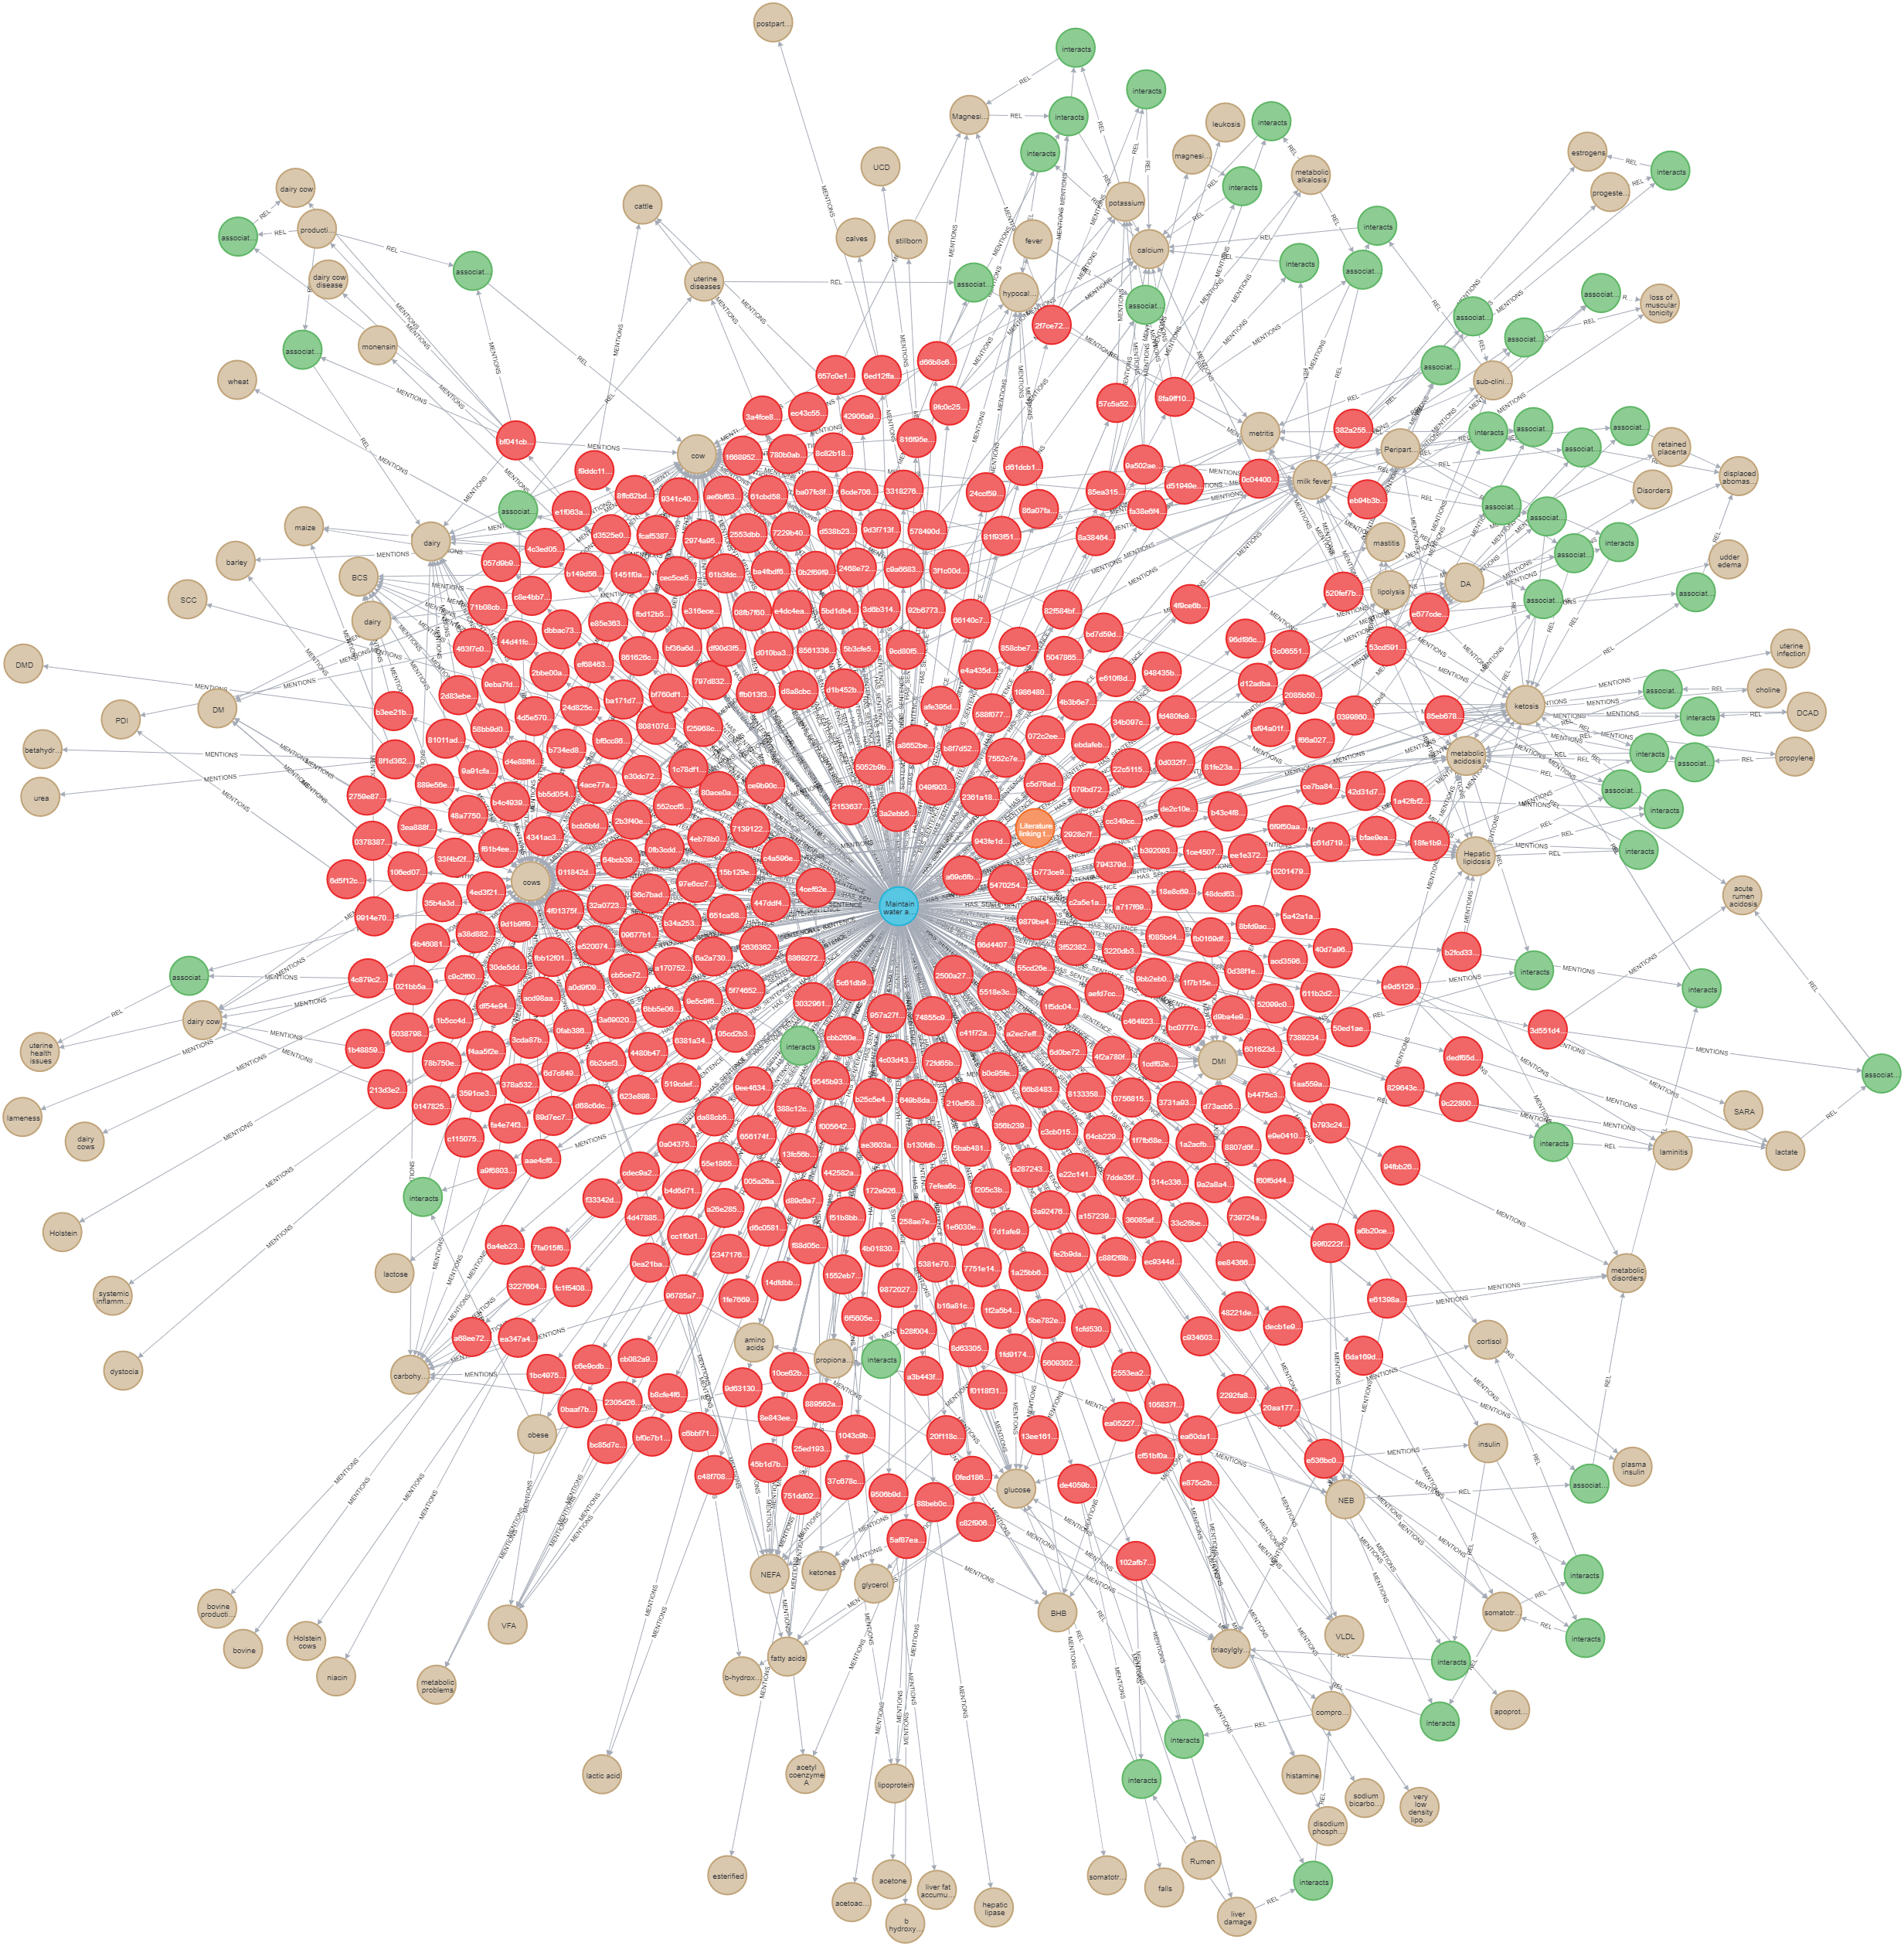

# ===== Try complie a function ===== 